# Exploraaaaaaaaaaation #

In [2]:
import matplotlib
import matplotlib.pyplot as plt

import pandas as pd
import seaborn as sns
import numpy as np

import json
from ast import literal_eval  # OP = OP, NP = P (by Articuno's Law)

%matplotlib inline

In [3]:
datapath = 'data/'

## Loading Recipes ##

In [4]:
filename = 'RAW_recipes.csv'

In [5]:
df_recipes = pd.read_csv(datapath + filename, index_col='id')

In [6]:
df_recipes['submitted'] = df_recipes['submitted'].astype('datetime64')

In [7]:
for col in ['nutrition', 'tags', 'ingredients', 'steps']:
    df_recipes[col] = df_recipes[col].apply(lambda x: literal_eval(x))

In [8]:
df_recipes = df_recipes[df_recipes['minutes'] < 300]

## Loading Interactions ##

In [8]:
filename = 'RAW_interactions.csv'

In [9]:
df_inter = pd.read_csv(datapath + filename)

In [10]:
df_inter['date'] = df_inter['date'].astype('datetime64')

## Recipe ratings ##

In [11]:
data = [[i, df_sub.shape[0], df_sub.rating.mean(), df_sub.rating.std()] for i, df_sub in df_inter.groupby('recipe_id')]
df_inter_recipe = pd.DataFrame(data, columns=['recipe_id', 'n_votes', 'avg_rating', 'std_rating'])

In [12]:
df_inter_recipe = df_inter_recipe.set_index('recipe_id')

In [13]:
df_inter_recipe

,n_votes,avg_rating,std_rating
recipe_id,,,
38,4,4.250000,0.500000
39,1,3.000000,NaN
40,9,4.333333,1.322876
41,2,4.500000,0.707107
43,1,1.000000,NaN
...,...,...,...
537459,1,5.000000,NaN
537485,1,5.000000,NaN
537543,1,0.000000,NaN


In [14]:
df = df_recipes.join(df_inter_recipe)

In [15]:
df

,name,minutes,contributor_id,submitted,tags,nutrition,n_steps,steps,description,ingredients,n_ingredients,n_votes,avg_rating,std_rating
id,,,,,,,,,,,,,,
137739,arriba baked winter squash mexican style,55,47892,2005-09-16,"[60-minutes-or-less, time-to-make, course, mai...","[51.5, 0.0, 13.0, 0.0, 2.0, 0.0, 4.0]",11,"[make a choice and proceed with recipe, depend...",autumn is my favorite time of year to cook! th...,"[winter squash, mexican seasoning, mixed spice...",7,3,5.0,0.000000
31490,a bit different breakfast pizza,30,26278,2002-06-17,"[30-minutes-or-less, time-to-make, course, mai...","[173.4, 18.0, 0.0, 17.0, 22.0, 35.0, 1.0]",9,"[preheat oven to 425 degrees f, press dough in...",this recipe calls for the crust to be prebaked...,"[prepared pizza crust, sausage patty, eggs, mi...",6,4,3.5,2.380476
112140,all in the kitchen chili,130,196586,2005-02-25,"[time-to-make, course, preparation, main-dish,...","[269.8, 22.0, 32.0, 48.0, 39.0, 27.0, 5.0]",6,"[brown ground beef in large pot, add chopped o...",this modified version of 'mom's' chili was a h...,"[ground beef, yellow onions, diced tomatoes, t...",13,1,4.0,NaN
59389,alouette potatoes,45,68585,2003-04-14,"[60-minutes-or-less, time-to-make, course, mai...","[368.1, 17.0, 10.0, 2.0, 14.0, 8.0, 20.0]",11,[place potatoes in a large pot of lightly salt...,"this is a super easy, great tasting, make ahea...","[spreadable cheese with garlic and herbs, new ...",11,2,4.5,0.707107
44061,amish tomato ketchup for canning,190,41706,2002-10-25,"[weeknight, time-to-make, course, main-ingredi...","[352.9, 1.0, 337.0, 23.0, 3.0, 0.0, 28.0]",5,"[mix all ingredients& boil for 2 1 / 2 hours ,...",my dh's amish mother raised him on this recipe...,"[tomato juice, apple cider vinegar, sugar, sal...",8,1,5.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
486161,zydeco soup,60,227978,2012-08-29,"[ham, 60-minutes-or-less, time-to-make, course...","[415.2, 26.0, 34.0, 26.0, 44.0, 21.0, 15.0]",7,"[heat oil in a 4-quart dutch oven, add celery ...",this is a delicious soup that i originally fou...,"[celery, onion, green sweet pepper, garlic clo...",22,6,5.0,0.000000
493372,zydeco spice mix,5,1500678,2013-01-09,"[15-minutes-or-less, time-to-make, course, pre...","[14.8, 0.0, 2.0, 58.0, 1.0, 0.0, 1.0]",1,[mix all ingredients together thoroughly],this spice mix will make your taste buds dance!,"[paprika, salt, garlic powder, onion powder, d...",13,1,5.0,NaN
308080,zydeco ya ya deviled eggs,40,37779,2008-06-07,"[60-minutes-or-less, time-to-make, course, mai...","[59.2, 6.0, 2.0, 3.0, 6.0, 5.0, 0.0]",7,"[in a bowl , combine the mashed yolks and mayo...","deviled eggs, cajun-style","[hard-cooked eggs, mayonnaise, dijon mustard, ...",8,5,5.0,0.000000


In [16]:
df.describe()

,minutes,contributor_id,n_steps,n_ingredients,n_votes,avg_rating,std_rating
count,221458.000000,2.214580e+05,221458.000000,221458.000000,221458.000000,221458.000000,133346.000000
mean,48.939298,5.389693e+06,9.731990,9.027436,4.849944,4.352174,0.790395
std,45.966821,9.832466e+07,5.897762,3.711995,17.178025,0.985539,0.880496
min,0.000000,2.700000e+01,0.000000,1.000000,1.000000,0.000000,0.000000
25%,20.000000,5.704200e+04,6.000000,6.000000,1.000000,4.000000,0.000000
50%,35.000000,1.751240e+05,9.000000,9.000000,2.000000,4.717949,0.577350
75%,60.000000,4.007080e+05,12.000000,11.000000,4.000000,5.000000,1.258306
max,295.000000,2.002290e+09,145.000000,43.000000,1613.000000,5.000000,3.535534


/opt/anaconda3/lib/python3.7/site-packages/numpy/lib/histograms.py:829: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
/opt/anaconda3/lib/python3.7/site-packages/numpy/lib/histograms.py:830: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


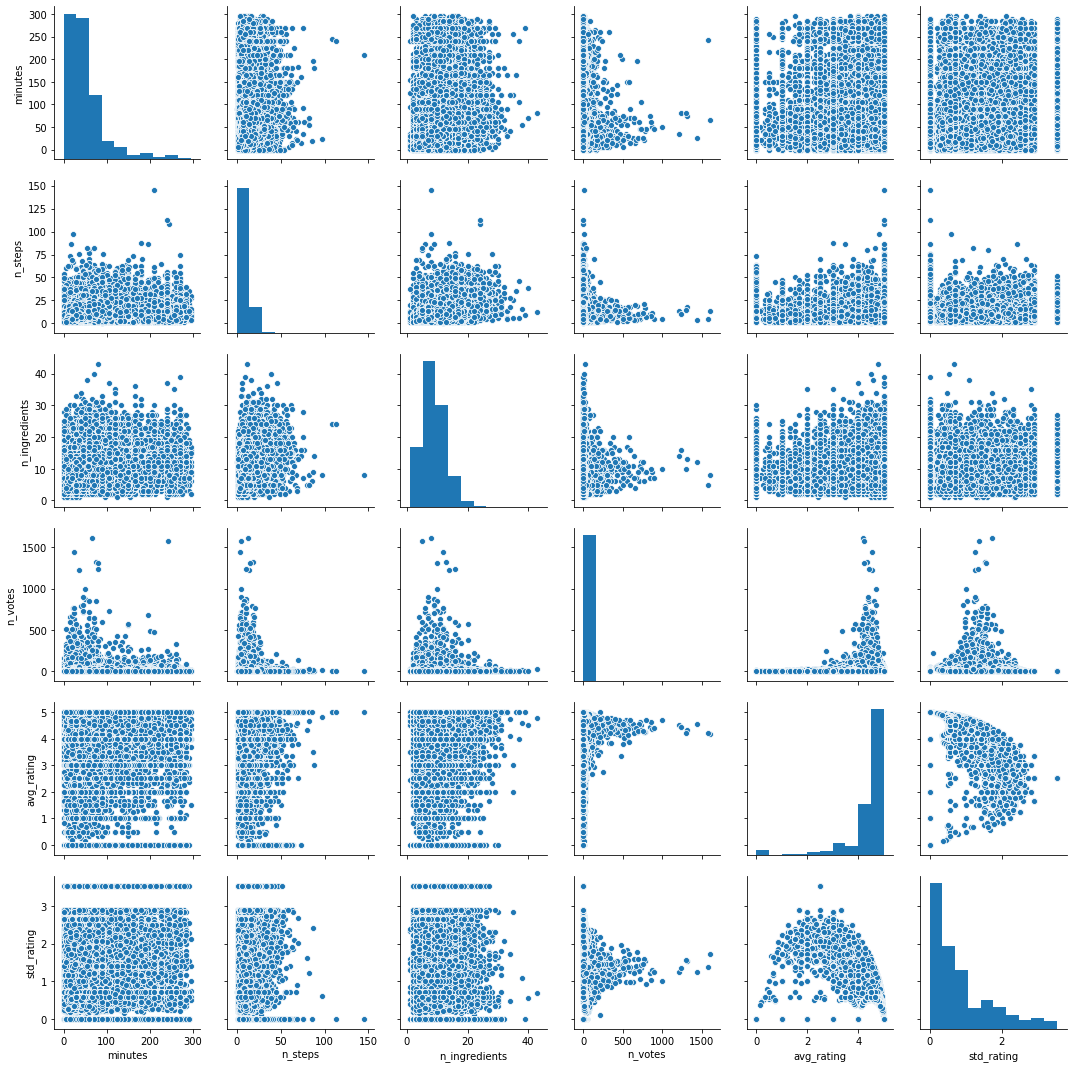

In [17]:
sns.pairplot(df[['minutes', 'n_steps', 'n_ingredients', 'n_votes', 'avg_rating', 'std_rating']])

In [18]:
df['tags'].values[:2]

array([list(['60-minutes-or-less', 'time-to-make', 'course', 'main-ingredient', 'cuisine', 'preparation', 'occasion', 'north-american', 'side-dishes', 'vegetables', 'mexican', 'easy', 'fall', 'holiday-event', 'vegetarian', 'winter', 'dietary', 'christmas', 'seasonal', 'squash']),
       list(['30-minutes-or-less', 'time-to-make', 'course', 'main-ingredient', 'cuisine', 'preparation', 'occasion', 'north-american', 'breakfast', 'main-dish', 'pork', 'american', 'oven', 'easy', 'kid-friendly', 'pizza', 'dietary', 'northeastern-united-states', 'meat', 'equipment'])],
      dtype=object)

In [15]:
for i in df_recipes[:10]['tags']:
    for j in i:
        print(j)
    print('\n')

60-minutes-or-less
time-to-make
course
main-ingredient
cuisine
preparation
occasion
north-american
side-dishes
vegetables
mexican
easy
fall
holiday-event
vegetarian
winter
dietary
christmas
seasonal
squash


30-minutes-or-less
time-to-make
course
main-ingredient
cuisine
preparation
occasion
north-american
breakfast
main-dish
pork
american
oven
easy
kid-friendly
pizza
dietary
northeastern-united-states
meat
equipment


time-to-make
course
preparation
main-dish
chili
crock-pot-slow-cooker
dietary
equipment
4-hours-or-less


60-minutes-or-less
time-to-make
course
main-ingredient
preparation
occasion
side-dishes
eggs-dairy
potatoes
vegetables
oven
easy
dinner-party
holiday-event
easter
cheese
stove-top
dietary
christmas
new-years
thanksgiving
independence-day
st-patricks-day
valentines-day
inexpensive
brunch
superbowl
equipment
presentation
served-hot


weeknight
time-to-make
course
main-ingredient
cuisine
preparation
occasion
north-american
canning
condiments-etc
vegetables
american
heirl